In [30]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [31]:
data = pd.read_csv("Loan_Prediction_Train.csv")

In [32]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [33]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [34]:
fill_value = data['LoanAmount'].median()
data['LoanAmount'] = data['LoanAmount'].fillna(fill_value)

In [35]:
data[['ApplicantIncome','LoanAmount']].isnull().sum()

ApplicantIncome    0
LoanAmount         0
dtype: int64

In [36]:
X = data.iloc[:,[6,8]].values

In [37]:
X

array([[5849.,  128.],
       [4583.,  128.],
       [3000.,   66.],
       ...,
       [8072.,  253.],
       [7583.,  187.],
       [4583.,  133.]])

In [38]:
X[:,0].mean(),X[:,1].mean()

(5403.459283387622, 145.75244299674267)

<function matplotlib.pyplot.show(close=None, block=None)>

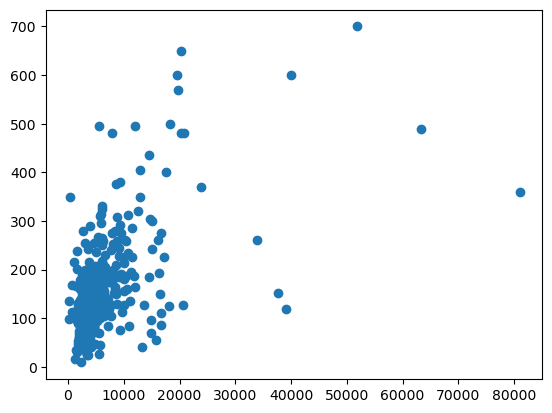

In [39]:
plt.scatter(data['ApplicantIncome'],data['LoanAmount'])
plt.show

In [40]:
from sklearn.cluster import KMeans
kmeans_1=KMeans(n_clusters=1,max_iter=300,random_state=1234)
kmeans_1.fit(X)
kmeans_1.inertia_  
kmeans_1.cluster_centers_

array([[5403.45928339,  145.752443  ]])

In [41]:
wcss = []
for i in range(1,20):
    k_means_1=KMeans(n_clusters=i,max_iter=300,random_state=1234)
    k_means_1.fit(X)
    wcss.append(round(k_means_1.inertia_,2))

In [42]:
wcss

[22881735550.85,
 9085073953.31,
 4135836459.39,
 2702655451.31,
 1443370226.58,
 958456690.96,
 710603719.21,
 534106270.73,
 418177075.86,
 329566726.14,
 262017611.66,
 202428885.78,
 178957907.29,
 144726830.02,
 127507289.22,
 104379496.08,
 88863222.19,
 78988640.17,
 67838203.68]

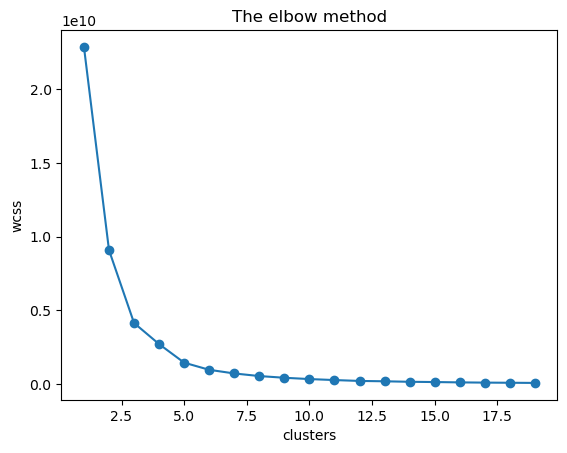

In [43]:
plt.plot(range(1,20),wcss)
plt.scatter(range(1,20),wcss)
plt.title("The elbow method")
plt.xlabel("clusters")
plt.ylabel("wcss")
plt.show()

In [44]:
kmeans=KMeans(n_clusters=5,max_iter=300,random_state=1234)
y_clusters = kmeans.fit_predict(X)
y_clusters

array([4, 0, 0, 0, 4, 4, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4,
       0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 4, 4, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 4,
       0, 4, 4, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0,
       4, 4, 0, 4, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 4, 4, 0, 0,
       4, 0, 0, 4, 0, 1, 0, 0, 4, 4, 4, 0, 0, 0, 0, 0, 1, 0, 4, 4, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 4, 4, 0, 1, 0, 1, 0, 4, 0, 4, 0, 4, 0,
       0, 3, 4, 4, 0, 0, 0, 4, 0, 0, 4, 0, 0, 0, 0, 4, 0, 3, 0, 4, 0, 0,
       0, 4, 0, 0, 4, 0, 0, 3, 0, 3, 0, 0, 0, 4, 0, 1, 4, 0, 0, 0, 4, 0,
       0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 4, 4, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 4, 4, 0, 0, 4, 0, 4, 0, 0, 0, 4, 0, 4, 4, 0, 0, 0, 4, 0,
       0, 4, 0, 4, 4, 4, 0, 0, 0, 0, 0, 0, 1, 0, 4, 0, 1, 0, 4, 0, 0, 4,
       0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 4, 0, 0, 0, 4, 0, 0, 4, 0, 0, 0, 0,

In [45]:
df = data
df['Cluster']=y_clusters
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Cluster
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,4
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,0
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,0
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,4
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,4


In [47]:
df['Cluster'].value_counts()

Cluster
0    433
4    141
1     33
3      5
2      2
Name: count, dtype: int64

In [49]:
df['Cluster']
df[df['Cluster']==0]
c1_data = df[df['Cluster']==0][['ApplicantIncome','LoanAmount']]
c2_data = df[df['Cluster']==1][['ApplicantIncome','LoanAmount']]
c3_data = df[df['Cluster']==2][['ApplicantIncome','LoanAmount']]
c4_data = df[df['Cluster']==3][['ApplicantIncome','LoanAmount']]
c5_data = df[df['Cluster']==4][['ApplicantIncome','LoanAmount']]

In [50]:
c1_data

,ApplicantIncome,LoanAmount
1,4583,128.0
2,3000,66.0
3,2583,120.0
6,2333,95.0
7,3036,158.0
...,...,...
607,3987,157.0
608,3232,108.0
609,2900,71.0
610,4106,40.0


In [51]:
c1_data_mean = df[df['Cluster']==0][['ApplicantIncome','LoanAmount']].mean()
c2_data_mean = df[df['Cluster']==1][['ApplicantIncome','LoanAmount']].mean()
c3_data_mean = df[df['Cluster']==2][['ApplicantIncome','LoanAmount']].mean()
c4_data_mean = df[df['Cluster']==3][['ApplicantIncome','LoanAmount']].mean()
c5_data_mean = df[df['Cluster']==4][['ApplicantIncome','LoanAmount']].mean()

In [52]:
c1_data_mean

ApplicantIncome    3252.676674
LoanAmount          118.314088
dtype: float64

In [53]:
df = {
    "Cluster 1":c1_data_mean,
    "Cluster 2":c2_data_mean,
    "Cluster 3":c3_data_mean,
    "Cluster 4":c4_data_mean,
    "Cluster 5":c5_data_mean,
}

In [54]:
pd.DataFrame(df)

,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5
ApplicantIncome,3252.676674,16222.303030,72168.5,40494.8,7284.879433
LoanAmount,118.314088,284.181818,425.0,366.4,185.829787


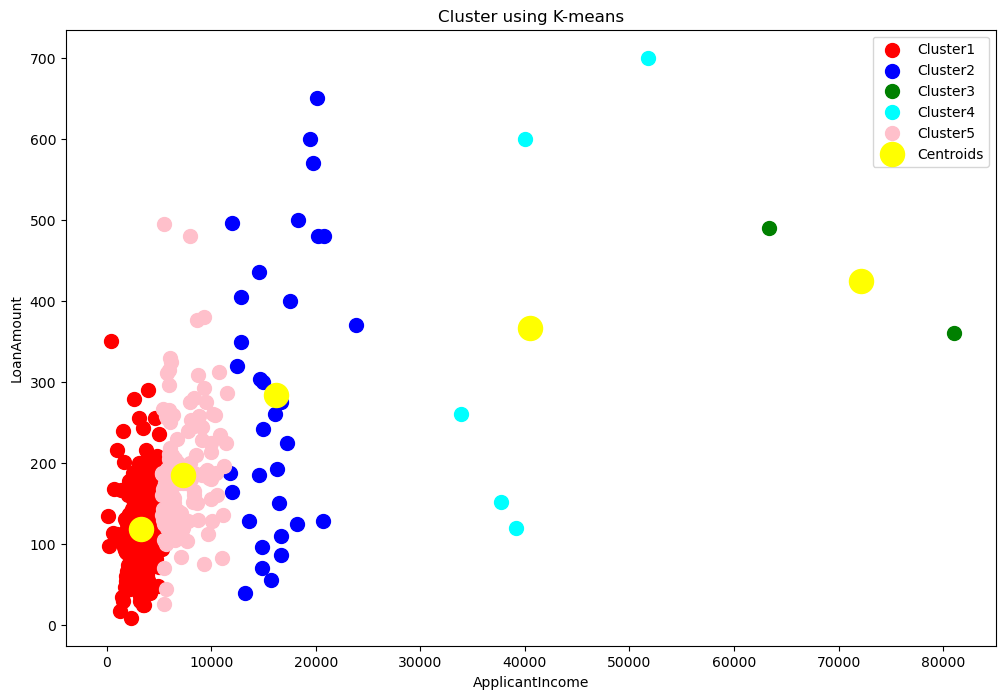

In [56]:
plt.figure(figsize=(12,8))
plt.scatter(X[y_clusters==0,0],X[y_clusters==0,1],s=100,c='red',label="Cluster1")
plt.scatter(X[y_clusters==1,0],X[y_clusters==1,1],s=100,c='blue',label="Cluster2")
plt.scatter(X[y_clusters==2,0],X[y_clusters==2,1],s=100,c='green',label="Cluster3")
plt.scatter(X[y_clusters==3,0],X[y_clusters==3,1],s=100,c='cyan',label="Cluster4")
plt.scatter(X[y_clusters==4,0],X[y_clusters==4,1],s=100,c='pink',label="Cluster5")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label="Centroids")
plt.title("Cluster using K-means")
plt.xlabel("ApplicantIncome")
plt.ylabel("LoanAmount")
plt.legend()
plt.show()